Aluno: Fabiano Baptista Castiglioni
Matrícula: 20231DEVAI0114

In [18]:
from sklearn.datasets import load_digits
import numpy as np

# Carrega o conjunto de dados MNIST
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [19]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [20]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [21]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

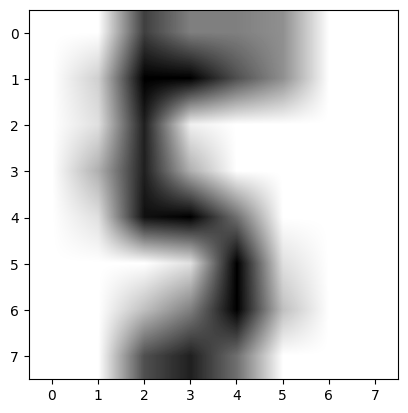

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X_train[25].reshape(8,8), cmap='binary', interpolation="bilinear")
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 50
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X_train)


X_digits_dist = np.zeros((len(X_train), n_clusters))
for i in range(n_clusters):
    cluster_points = X_train[agg_labels == i]
    representative_point = cluster_points.mean(axis=0)
    X_digits_dist[:, i] = np.linalg.norm(X_train - representative_point, axis=1)

representative_digits_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digits_idx]

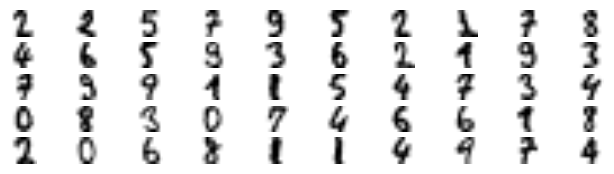

In [30]:
plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(n_clusters//10, 10, index+1)
  plt.imshow(X_representative_digit.reshape(8,8), cmap='binary', interpolation="bilinear")
  plt.axis("off")
plt.show()

In [32]:
import numpy as np

y_representative_digits = np.array([
    2, 2, 5, 7, 9, 5, 2, 1, 7, 8,
    4, 6, 5, 9, 3, 6, 2, 1, 9, 3,
    7, 9, 9, 1, 1, 5, 4, 7, 3, 4,
    0, 8, 3, 0, 7, 4, 6, 6, 1, 8,
    2, 0, 6, 8, 1, 1, 4, 9, 7, 4
])


In [33]:
y_representative_digits == y_train[representative_digits_idx]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [34]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.818639798488665

In [35]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(n_clusters):
  y_train_propagated[agg_labels == i] = y_representative_digits[i]

In [36]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8639798488664987

In [37]:
percentile_closest = 95

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), agg_labels]
for i in range(n_clusters):
    in_cluster = (agg_labels == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
print(len(y_train_partially_propagated))

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
accuracy = log_reg.score(X_test, y_test)
print("Accuracy on the test set:", accuracy)

train_accuracy = (y_train_partially_propagated == y_train[partially_propagated]).mean()
print("Accuracy on the partially propagated training set:", train_accuracy)

1306
Accuracy on the test set: 0.8488664987405542
Accuracy on the partially propagated training set: 0.9701378254211332
